In [1]:
from jikanpy import Jikan
jikan = Jikan()

print(jikan.anime(457)['data'])

{'mal_id': 457, 'url': 'https://myanimelist.net/anime/457/Mushishi', 'images': {'jpg': {'image_url': 'https://cdn.myanimelist.net/images/anime/2/73862.jpg', 'small_image_url': 'https://cdn.myanimelist.net/images/anime/2/73862t.jpg', 'large_image_url': 'https://cdn.myanimelist.net/images/anime/2/73862l.jpg'}, 'webp': {'image_url': 'https://cdn.myanimelist.net/images/anime/2/73862.webp', 'small_image_url': 'https://cdn.myanimelist.net/images/anime/2/73862t.webp', 'large_image_url': 'https://cdn.myanimelist.net/images/anime/2/73862l.webp'}}, 'trailer': {'youtube_id': None, 'url': None, 'embed_url': 'https://www.youtube-nocookie.com/embed/h371H0KIuPo?enablejsapi=1&wmode=opaque&autoplay=1', 'images': {'image_url': None, 'small_image_url': None, 'medium_image_url': None, 'large_image_url': None, 'maximum_image_url': None}}, 'approved': True, 'titles': [{'type': 'Default', 'title': 'Mushishi'}, {'type': 'Japanese', 'title': '蟲師'}, {'type': 'English', 'title': 'Mushi-Shi'}, {'type': 'German', 

In [2]:
import json
import pandas as pd

df = pd.DataFrame(columns=['mal_id', 'title_english', 'type', 'score', 'scored_by', 'rank', 'favorites', 'episodes', 'members', 'year', 'popularity', 'synopsis', 'url', 'genre'])


In [3]:

import time


def save_anime(data, df):
   
    try:
        df.loc[len(df)] = {
            "mal_id": data["mal_id"],
            "title_english": data["title_english"],
            "type": data["type"],
            "score": data["score"],
            "scored_by": data["scored_by"],
            "rank": data["rank"],
            "favorites": data["favorites"],
            "episodes": data["episodes"],
            "members": data["members"],
            "year": data["year"],
            "popularity": data["popularity"],
            "synopsis": data["synopsis"],
            "url": data["url"],
            "genre": [g["name"] for g in data["genres"]]
        }
    except Exception as e:
        print("Error: " + str(e))

In [4]:


page = 1
next_page = True

while page<=150:
    try:
        response = jikan.top('anime', page)


        for index, anime in enumerate(response['data']):

            save_anime(anime, df)



        if response['pagination']['has_next_page'] == False:
            break

        print(f"Fetched page {page} with {len(response['data'])} anime")
        time.sleep(1.2)
    except Exception as e:
        print("Error2: " + str(e))

    page += 1




Fetched page 1 with 25 anime
Fetched page 2 with 25 anime
Fetched page 3 with 25 anime
Fetched page 4 with 25 anime
Fetched page 5 with 25 anime
Fetched page 6 with 25 anime
Fetched page 7 with 25 anime
Fetched page 8 with 25 anime
Fetched page 9 with 25 anime
Fetched page 10 with 25 anime
Fetched page 11 with 25 anime
Fetched page 12 with 25 anime
Fetched page 13 with 25 anime
Fetched page 14 with 25 anime
Fetched page 15 with 25 anime
Fetched page 16 with 25 anime
Fetched page 17 with 25 anime
Fetched page 18 with 25 anime
Fetched page 19 with 25 anime
Fetched page 20 with 25 anime
Fetched page 21 with 25 anime
Fetched page 22 with 25 anime
Fetched page 23 with 25 anime
Fetched page 24 with 25 anime
Fetched page 25 with 25 anime
Fetched page 26 with 25 anime
Fetched page 27 with 25 anime
Fetched page 28 with 25 anime
Fetched page 29 with 25 anime
Fetched page 30 with 25 anime
Fetched page 31 with 25 anime
Fetched page 32 with 25 anime
Fetched page 33 with 25 anime
Fetched page 34 wit

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binarized_data = mlb.fit_transform(df['genre'])
mlb_df = pd.DataFrame(binarized_data, columns=mlb.classes_, index=df.index)
df = pd.concat([df, mlb_df], axis=1)
df.drop(columns=['genre'], inplace=True)


In [6]:
from sklearn.manifold import TSNE

X = df.select_dtypes(include='int64').fillna(0).values
tsne = TSNE(n_components=2, perplexity=30, metric='cosine')
coords = tsne.fit_transform(X)
print(coords)


[[ 49.4862     18.673223 ]
 [ 14.795501   19.987299 ]
 [ 66.48526    16.185394 ]
 ...
 [-51.909588   31.88241  ]
 [-67.39616    -3.5924978]
 [-70.318756    7.7647715]]


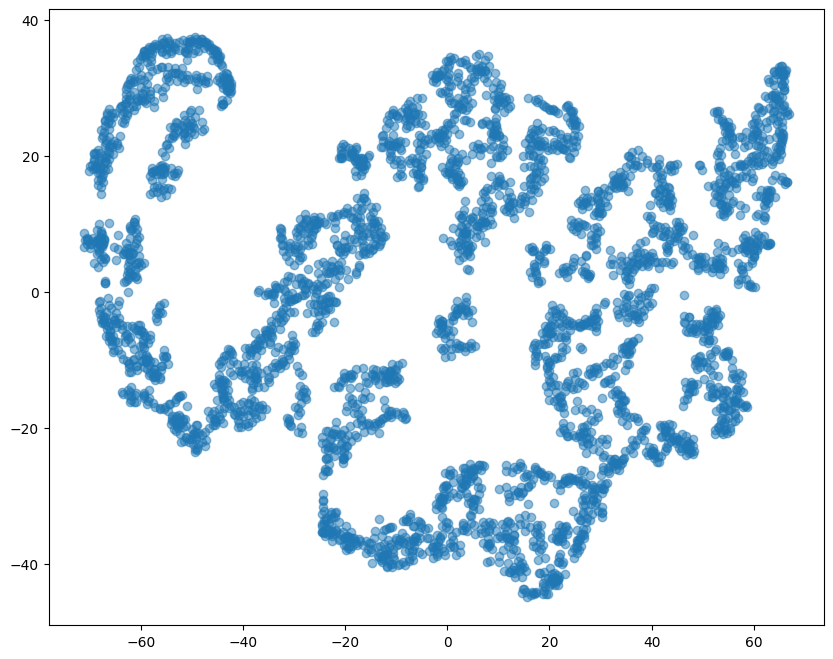

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5)
plt.show()

In [8]:
df['x'] = coords[:,0]
df['y'] = coords[:,1]
df.to_csv('data.csv', index=False)